In [2]:
%matplotlib widget

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import PolygonSelector
import ipywidgets as widgets
from matplotlib.path import Path
from IPython.display import display

class ScanpyInteractivePolygonApp:
    def __init__(self, adata, spot_size=5, color=None, subsample=False):
        self.adata = adata
        num_samples = len(adata)
        # For latency, we sample a subset of spots for visualization
        if subsample:
            self.num_to_sample_for_plot = max(1, len(adata) // 50_000)
        else:
            self.num_to_sample_for_plot = 1
        self.selected_spots = None
        self.color = color
        self.fig, self.ax = plt.subplots(figsize=(8, 8))

        # Extract the scale factor for transforming spatial coordinates to pixel space
        if 'spatial' in adata.uns.keys():
            library_id = list(adata.uns['spatial'].keys())[0]
            self.scale_factor = adata.uns["spatial"][library_id]["scalefactors"]["tissue_hires_scalef"]
            self.has_native_spot_size = True
        else:
            self.scale_factor = 1.0
            self.has_native_spot_size = False
            self.spot_size = spot_size
        
        # Display the initial image
        self.plot_slide()
        
        # Initialize Polygon Selector for ROI
        self.polygon_selector = PolygonSelector(
            self.ax, self.on_select, useblit=True, props=dict(color="red", linewidth=2)
        )
        
        # Filter Button
        self.filter_button = widgets.Button(description="Filter ROI")
        self.filter_button.on_click(self.filter_spots)
        display(self.filter_button)
        
        # Clear Button
        self.clear_button = widgets.Button(description="Clear ROI")
        self.clear_button.on_click(self.clear_selection)
        display(self.clear_button)
    
    def plot_slide(self):
        # Plot the spatial slide image and spot positions
        if self.has_native_spot_size:
            sc.pl.spatial(self.adata[::self.num_to_sample_for_plot], color=self.color, ax=self.ax, show=False, title="Select ROI")
        else:
            sc.pl.spatial(self.adata[::self.num_to_sample_for_plot], color=self.color, ax=self.ax, show=False, title="Select ROI", spot_size=self.spot_size)
        self.ax.set_title("Draw Polygon ROI on Spots")
        plt.show()
        
    def on_select(self, verts):
        # Capture the vertices of the polygon ROI
        self.polygon_path = Path(verts)
        # Draw the selected polygon for feedback
        polygon = plt.Polygon(verts, closed=True, fill=False, edgecolor="red", linewidth=2)
        self.ax.add_patch(polygon)
        plt.draw()
    
    def filter_spots(self, _):
        # Filter spots within the selected polygon ROI
        coords = self.adata.obsm["spatial"] * self.scale_factor
        in_roi = self.polygon_path.contains_points(coords)
        self.selected_spots = self.adata[in_roi].copy()
        print(coords.shape)
        
        # Update visualization to show filtered spots
        if self.has_native_spot_size:
            sc.pl.spatial(self.selected_spots[::self.num_to_sample_for_plot], color=None, show=True, title="Filtered ROI Spots")
        else:
            sc.pl.spatial(self.selected_spots[::self.num_to_sample_for_plot], color=None, show=True, title="Filtered ROI Spots", spot_size=self.spot_size)
        print("Filtered spots based on selected ROI. New adata object is stored in self.selected_spots.")
    
    def clear_selection(self, _):
        # Clear any existing ROI and selections
        for patch in self.ax.patches:
            patch.remove()  # Remove drawn polygon
        self.selected_spots = None
        plt.draw()
        print("Cleared the ROI selection.")
        


/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/l

In [3]:
# Usage example:
# Load your spatial data
adata = sc.datasets.visium_sge()  # Replace with your actual Scanpy spatial object
print(adata)

  0%|          | 0.00/9.50M [00:00<?, ?B/s]

  0%|          | 0.00/26.9M [00:00<?, ?B/s]

/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3798 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


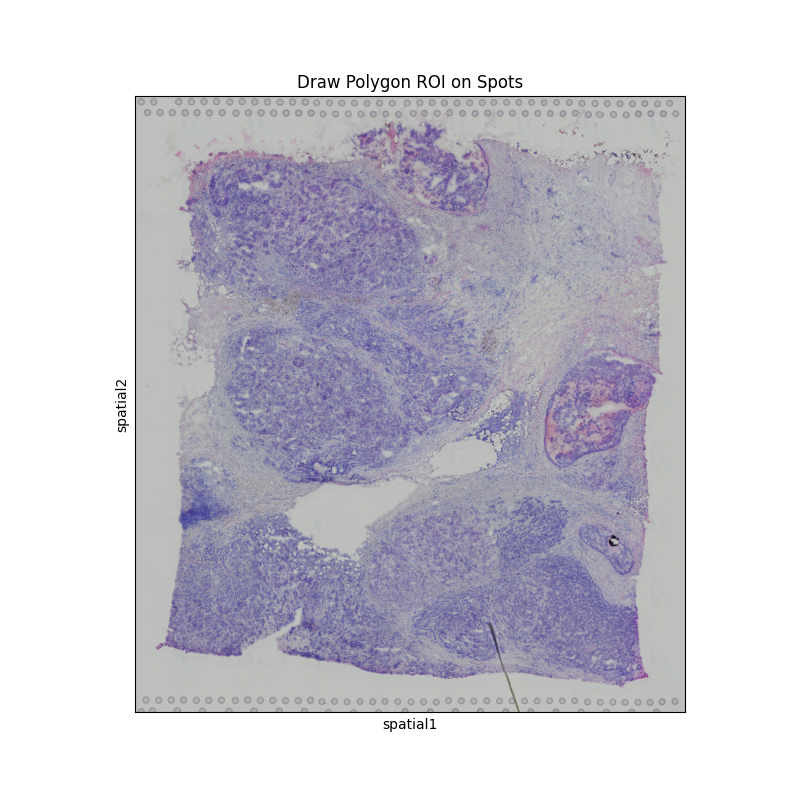

Button(description='Filter ROI', style=ButtonStyle())

Button(description='Clear ROI', style=ButtonStyle())

(3798, 2)


/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/adamcatto/opt/miniconda3/envs/jupyter_roi/lib/python3.10/site-packages/anndata/_core/anndata.py:1760: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


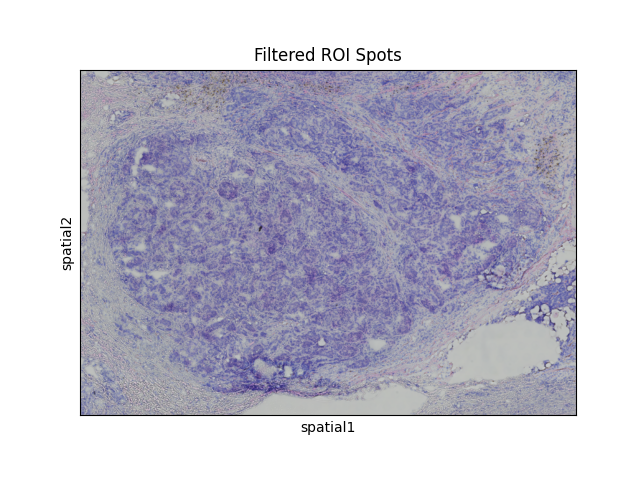

Filtered spots based on selected ROI. New adata object is stored in self.selected_spots.


In [4]:
app = ScanpyInteractivePolygonApp(adata)

In [5]:
app.selected_spots

AnnData object with n_obs × n_vars = 552 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

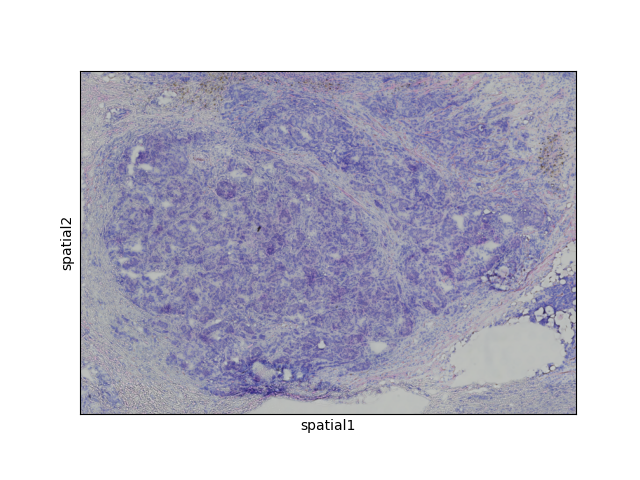

In [7]:
sc.pl.spatial(app.selected_spots, spot_size=5)